In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
from scipy.stats import norm, t
from scipy import stats
import seaborn as sns

# sns.set()
# sns.axes_style("darkgrid")
#

In [2]:
sns.set()
# sns.set_style("whitegrid")

In [3]:
brl_data = pd.read_csv("brl.csv")
brl_price = np.array(brl_data["Open"])

oil_data = pd.read_csv("oil.csv")
oil_price = np.array(oil_data["Open"])

In [4]:
brl = np.array(brl_data["Date"])
oil = np.array(oil_data["Date"])

In [5]:
dates_ind = [np.where(brl == date)[0][0] for date in oil]

In [6]:
brl_price = [brl_price[i] for i in dates_ind]

In [7]:
brl_price = np.array(brl_price)

In [8]:
nans = np.where(np.isnan(brl_price))[0]
print(nans)

[ 437  620 1565 1656 2034]


In [9]:
ys = brl_price[np.isnan(brl_price) == 0]
print(len(ys))

2675


In [10]:
np.where(np.isnan(ys))[0]

array([], dtype=int64)

In [11]:
for n in nans:
    oil_price = np.delete(oil_price, n)
print(len(oil_price))

2675


In [12]:
xs = oil_price

In [13]:
np.where(np.isnan(xs))[0]

array([], dtype=int64)

### Regresja i R^2

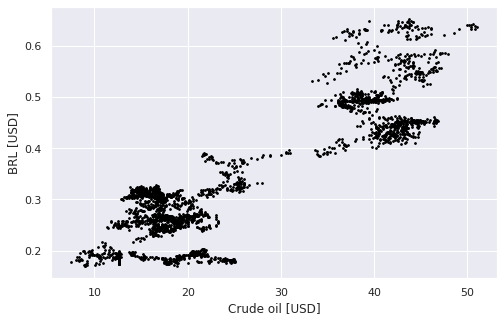

In [14]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.scatter(xs, ys, s=3, c="black")
plt.xlabel("Crude oil [USD]")
plt.ylabel("BRL [USD]")
# plt.grid()
plt.savefig("fig1.png", dpi=300)

In [15]:
num = np.sum((xs - np.mean(xs)) * ys)
den = np.sum((xs - np.mean(xs)) ** 2)
a = num / den
b = np.mean(ys) - a * np.mean(xs)

In [16]:
print(a, b)

0.009387961534095176 0.10145750252527577


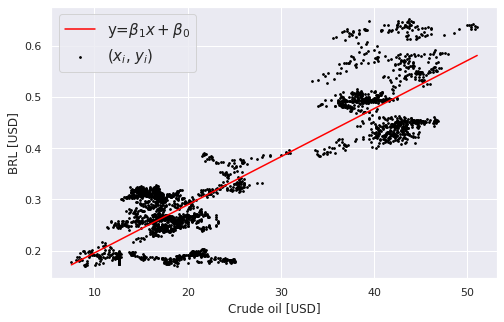

In [17]:
X = np.linspace(min(xs), max(xs), 1000)
plt.plot(X, a * X + b, color="red", label=r"y=$\beta_1x + \beta_0$")
plt.scatter(xs, ys, s=3, c="black", label="($x_i$, $y_i$)")
# plt.grid()
plt.xlabel("Crude oil [USD]")
plt.ylabel("BRL [USD]")
plt.legend(fontsize=15)
plt.savefig("fig2.png", dpi=300)

In [18]:
yi_hat = a * xs + b
R2 = np.sum((yi_hat - np.mean(ys)) ** 2) / np.sum((ys - np.mean(ys)) ** 2)
print(f"R2 = {R2}")

R2 = 0.7754974422002088


## Statystyki

In [19]:
np.mean(xs)

25.568977565233645

In [20]:
np.mean(ys)

0.3414980803738318

In [21]:
n = len(xs)

In [22]:
n / np.sum(1 / xs)  # śr. harmoniczna

20.919115565265372

In [23]:
n / np.sum(1 / ys)

0.30003563203428396

In [24]:
gmean(xs)  # śr. geometryczna

23.055023521419248

In [25]:
gmean(ys)

0.3198146801786629

In [26]:
# śr. ucinana:

In [27]:
ei = ys - yi_hat

In [28]:
Q1 = np.quantile(ei, 0.25)
Q3 = np.quantile(ei, 0.75)
IQR = Q3 - Q1

In [29]:
mask = np.logical_and(ei >= Q1 - 1.5 * IQR, ei <= Q3 + 1.5 * IQR + 1)

In [30]:
k = n - len(ei[mask])

In [31]:
k

11

In [32]:
xsort = np.sort(xs)
ysort = np.sort(ys)

In [33]:
xtrim = xsort[k + 1 : n - k]
ytrim = ysort[k + 1 : n - k]

In [34]:
trim1 = 1 / (n - 2 * k) * np.sum(xtrim)
trim2 = 1 / (n - 2 * k) * np.sum(ytrim)

In [35]:
trim1

25.5352281541651

In [36]:
trim2

0.34087207199396913

In [37]:
np.median(xsort)

19.99

In [38]:
np.median(ysort)

0.307872

In [39]:
np.median(xsort[xsort < np.median(xsort)])

16.389999

In [40]:
q1x = np.quantile(xsort, 0.25)
print(q1x)

16.398300499999998


In [41]:
q3x = np.quantile(xsort, 0.75)
print(q3x)

38.914998999999995


In [42]:
q1y = np.quantile(ysort, 0.25)
print(q1y)

0.25181


In [43]:
q3y = np.quantile(ysort, 0.75)
print(q3y)

0.445911


In [44]:
q3x - q1x

22.516698499999997

In [45]:
q3y - q1y

0.19410100000000002

In [46]:
xsort[-1] - xsort[0]

43.52000099999999

In [47]:
ysort[-1] - ysort[0]

0.482132

In [48]:
s2x = np.var(xs)
# print(s1)

In [49]:
s2y = np.var(ys)
# print(s2)

In [50]:
sx = np.sqrt(s2x)
print(sx)

11.749465208716499


In [51]:
sy = np.sqrt(s2y)
print(sy)

0.12525619544216218


In [52]:
m3x = 1 / n * np.sum((xs - np.mean(xs)) ** 3)
print(m3x)

901.1040545054329


In [53]:
m3y = 1 / n * np.sum((ys - np.mean(ys)) ** 3)
print(m3y)

0.0012430228083551637


In [54]:
m3x / s2x ** (3 / 2)

0.5555467930868183

In [55]:
m3y / s2y ** (3 / 2)

0.6325304670549873

In [56]:
m4x = 1 / n * np.sum((xs - np.mean(xs)) ** 4)
print(m4x)

31751.810681597184


In [57]:
m4y = 1 / n * np.sum((ys - np.mean(ys)) ** 4)
print(m4y)

0.0005828457150044598


In [58]:
m4x / s2x**2

1.6660809473776759

In [59]:
m4y / s2y**2

2.3678639364608594

In [60]:
cov_XY = np.sum((xs - np.mean(xs)) * (ys - np.mean(ys))) / n
cov_XY

1.2960074578860294

In [61]:
r_XY = cov_XY / (sx * sy)
r_XY

0.8806233259460081

# Estymacja przedziałowa

In [62]:
n = len(xs)
a = 0.05
z_t = t.ppf(1 - a / 2, df=n - 2)
num = np.sum((xs - np.mean(xs)) * ys)
den = np.sum((xs - np.mean(xs)) ** 2)
a = num / den
b = np.mean(ys) - a * np.mean(xs)
S_2 = np.sum((ys - a * xs - b) ** 2) / (n - 2)


b1_sig_2 = (S_2 / sum((xs - np.mean(xs)) ** 2)) ** (1 / 2)
b1_random_S_2L = a - z_t * b1_sig_2
b1_random_S_2R = a + z_t * b1_sig_2
b1_random_S_2L, b1_random_S_2R

(0.0091963873117066, 0.009579535756483753)

In [63]:
b0_sig_2 = (S_2 * (1 / n + np.mean(xs) ** 2 / sum((xs - np.mean(xs)) ** 2))) ** (1 / 2)
b0_random_S_2L = b - z_t * b0_sig_2
b0_random_S_2R = b + z_t * b0_sig_2
b0_random_S_2L, b0_random_S_2R

(0.09606673003720766, 0.10684827501334389)

# Residua

In [64]:
ei = ys - a * xs - b
mu_e = np.mean(ei)

In [65]:
sig_e = np.std(ei)

In [66]:
q1_e = np.quantile(ei, 0.25)

In [67]:
q3_e = np.quantile(ei, 0.75)

In [68]:
igr_e = np.quantile(ei, 0.75) - np.quantile(ei, 0.25)

In [69]:
q1_e - 1.5 * igr_e, q3_e + 1.5 * igr_e

(-0.15272338553228226, 0.15578334750655243)

In [70]:
med_e = np.median(ei)
med_e

0.0020064874943807876

In [71]:
max(ei) - min(ei)

0.34279661844121523

In [72]:
np.sum((ei - np.mean(ei)) ** 3) / n / np.std(ei) ** 3

0.005096620247323019

In [73]:
np.sum((ei - np.mean(ei)) ** 4) / n / np.std(ei) ** 4

3.011046997775393

In [74]:
f1 = q1_e - 1.5 * igr_e <= ei
f2 = ei <= q3_e + 1.5 * igr_e
filter_ei = ei[np.all([f1, f2], 0)]
filter_xs = xs[np.all([f1, f2], 0)]
filter_ys = ys[np.all([f1, f2], 0)]
print(len(ei) - len(filter_ei))

34


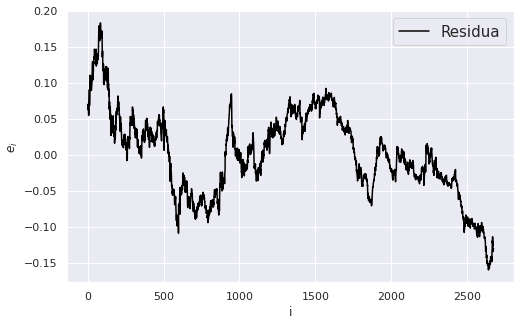

In [75]:
plt.rcParams["figure.figsize"] = [8, 5]
points = np.linspace(min(ei), max(ei), 100)
plt.plot(ei, c="black", label="Residua")
# plt.grid()
plt.legend(fontsize=15)
plt.xlabel("i")
plt.ylabel("$e_i$")
plt.savefig("residua.png", dpi=300)
plt.show()

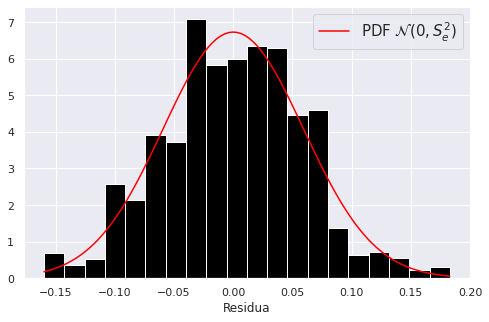

In [76]:
plt.rcParams["figure.figsize"] = [8, 5]
points = np.linspace(min(ei), max(ei), 100)

plt.hist(ei, bins=20, density=True, color="black")
plt.plot(
    points, norm.pdf(points, mu_e, sig_e), c="red", label=r"PDF $\mathcal{N}(0,S^2_e)$"
)
plt.legend(fontsize=15)
plt.xlabel("Residua")
plt.savefig("fig4.png")
plt.show()

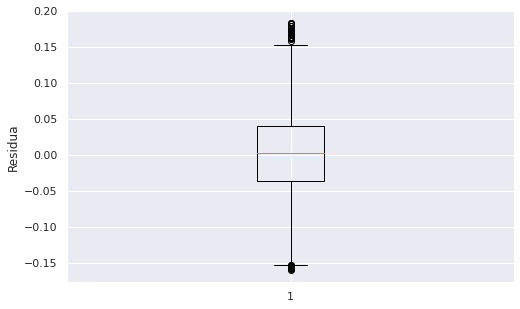

In [77]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.boxplot(ei)
plt.ylabel("Residua")
plt.savefig("fig5.png")
plt.show()

In [78]:
print(stats.kstest((ei - mu_e) / sig_e, "norm"))
print(stats.shapiro((ei - mu_e) / sig_e))
print(stats.jarque_bera((ei - mu_e) / sig_e))

KstestResult(statistic=0.028137612217010943, pvalue=0.02838934605657273)
ShapiroResult(statistic=0.9959713816642761, pvalue=1.310465336246125e-06)
Jarque_beraResult(statistic=0.025182707650562443, pvalue=0.9874875856048438)


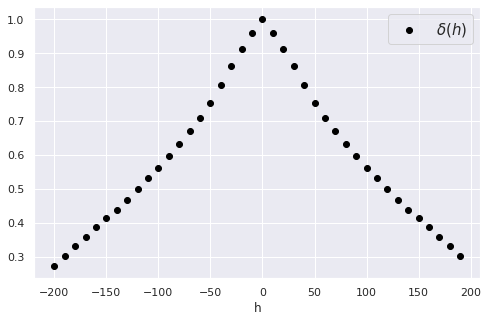

In [79]:


def e_autocow(xt, h):
    n = len(xt)
    mu = np.mean(xt)
    sum = (
        1
        / n
        * np.sum(
            np.array([(xt[i + abs(h)] - mu) * (xt[i] - mu) for i in range(n - abs(h))])
        )
    )
    return sum


def e_autocor(xt, h):
    return e_autocow(xt, h) / e_autocow(xt, 0)


plt.rcParams["figure.figsize"] = [8, 5]
hs = np.arange(-200, 200, 10)
# plot_acf(ei,lags =np.arange(1,200,10))
auto = [e_autocor(ei, h) for h in hs]
# auto = [e_autocor(np.random.normal(0,1,n),h) for h in hs]

plt.scatter(hs, auto, c="black", label="$\delta(h)$")
plt.legend(fontsize=15)
plt.xlabel("h")
plt.savefig("fig6.png")
plt.show()

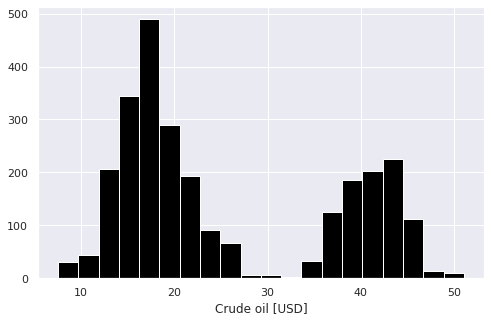

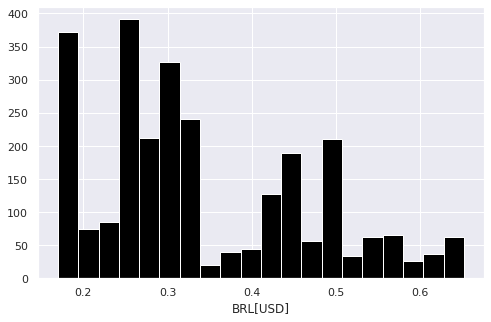

In [80]:
plt.hist(xs, color="black", bins=20)
plt.xlabel("Crude oil [USD]")
plt.show()
plt.hist(ys, color="black", bins=20)
plt.xlabel("BRL[USD]")
plt.show()

In [81]:
np.sum((xs - np.mean(xs)) ** 3) / n / np.std(xs) ** 3

0.5555467930868185

In [82]:
np.sum((ys - np.mean(ys)) ** 3) / n / (np.std(ys) ** 3)

0.6325304670549872

# Predykcja

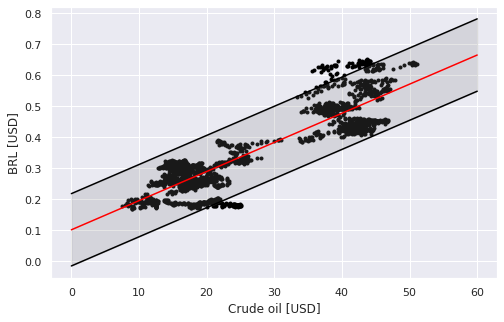

In [83]:
x0 = np.linspace(0, 60, 100)
sig = sig_e
alfa = 0.05
z = norm.ppf(1 - a / 2)
xi = xs
yi = ys

n = len(xi)
z_t = t.ppf(1 - alfa / 2, df=n - 2)

e_b1 = np.sum((xi - np.mean(xi)) * yi) / np.sum(((xi - np.mean(xi)) ** 2))
e_b0 = np.mean(yi) - e_b1 * np.mean(xi)
e_y0 = e_b0 + e_b1 * x0
S_2 = np.sum((yi - e_b1 * xi - e_b0) ** 2) / (n - 2)

L = e_y0 - z_t * np.sqrt(S_2) * np.sqrt(
    1 + 1 / n + (x0 - np.mean(xi)) ** 2 / (np.sum((xi - np.mean(xi)) ** 2))
)
R = e_y0 + z_t * np.sqrt(S_2) * np.sqrt(
    1 + 1 / n + (x0 - np.mean(xi)) ** 2 / (np.sum((xi - np.mean(xi)) ** 2))
)
# L = e_y0 - z_t * np.sqrt(S_2) * np.sqrt( 1/n + ( x0 - np.mean(xi))**2/( np.sum( (xi - np.mean(xi) )**2 ) ) )
# R = e_y0 + z_t * np.sqrt(S_2) * np.sqrt( 1/n + ( x0 - np.mean(xi))**2/( np.sum( (xi - np.mean(xi) )**2 ) ) )

plt.rcParams["figure.figsize"] = [8, 5]
plt.scatter(xi, yi, c="black", marker=".")
plt.fill_between(x0, L, R, color="gray", alpha=0.2)
plt.plot(x0, L, c="black")
plt.plot(x0, R, c="black")
plt.plot(x0, e_y0, c="red")
# print(min(y_S2_R-y_S2_L),max(y_S2_R-y_S2_L))
plt.xlabel("Crude oil [USD]")
plt.ylabel("BRL [USD]")
plt.savefig("fig7.png", dpi=600)

In [84]:
ys

array([0.63674 , 0.640082, 0.641601, ..., 0.178164, 0.180783, 0.179498])